In [116]:
import pandas as pd
import json
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('./credit_risk.csv')

df

,História de crédito,Dívida,Garantias,Renda Anual,Risco
0,Ruim,Alta,Nenhuma,< 15000,Alto
1,Desconhecida,Alta,Nenhuma,>= 15000 e <=35000,Alto
2,Desconhecida,Baixa,Nenhuma,>= 15000 e <=35000,Moderado
3,Desconhecida,Baixa,Nenhuma,> 35000,Alto
4,Desconhecida,Baixa,Nenhuma,> 35000,Baixo
5,Desconhecida,Baixa,Adequada,> 35000,Baixo
6,Ruim,Baixa,Nenhuma,< 15000,Alto
7,Ruim,Baixa,Adequada,> 35000,Moderado
8,Boa,Baixa,Nenhuma,> 35000,Baixo
9,Boa,Alta,Adequada,> 35000,Baixo


In [118]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print(y)

[['Ruim' 'Alta' 'Nenhuma' '< 15000']
 ['Desconhecida' 'Alta' 'Nenhuma' '>= 15000 e <=35000']
 ['Desconhecida' 'Baixa' 'Nenhuma' '>= 15000 e <=35000']
 ['Desconhecida' 'Baixa' 'Nenhuma' '> 35000']
 ['Desconhecida' 'Baixa' 'Nenhuma' '> 35000']
 ['Desconhecida' 'Baixa' 'Adequada' '> 35000']
 ['Ruim' 'Baixa' 'Nenhuma' '< 15000']
 ['Ruim' 'Baixa' 'Adequada' '> 35000']
 ['Boa' 'Baixa' 'Nenhuma' '> 35000']
 ['Boa' 'Alta' 'Adequada' '> 35000']
 ['Boa' 'Alta' 'Nenhuma' '< 15000']
 ['Boa' 'Alta' 'Nenhuma' '>= 15000 e <=35000']
 ['Boa' 'Alta' 'Nenhuma' '> 35000']
 ['Ruim' 'Alta' 'Nenhuma' '>= 15000 e <=35000']]
['Alto' 'Alto' 'Moderado' 'Alto' 'Baixo' 'Baixo' 'Alto' 'Moderado' 'Baixo'
 'Baixo' 'Alto' 'Moderado' 'Baixo' 'Alto']


In [119]:
le = LabelEncoder()
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [120]:
for i in range(X.shape[1]):
        X[:, i] = le.fit_transform(X[:, i])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [122]:
y_pred = dtc.predict(X_test)

In [123]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy:  0.5
Confusion Matrix:  [[0 1 1]
 [0 2 0]
 [0 0 0]]
Classification Report:                precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         2
       Baixo       0.67      1.00      0.80         2
    Moderado       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.22      0.33      0.27         4
weighted avg       0.33      0.50      0.40         4



/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

In [124]:
print("Feature importances: ", dtc.feature_importances_)

Feature importances:  [0.2804908  0.21026339 0.         0.5092458 ]


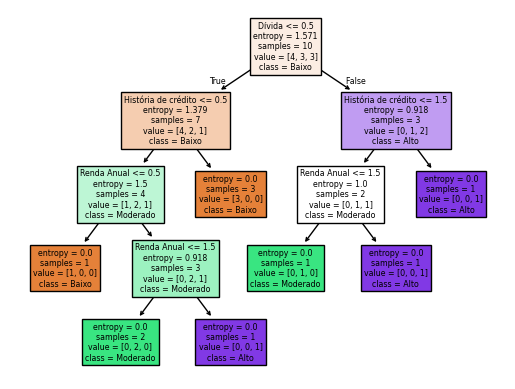

In [125]:
tree.plot_tree(dtc, feature_names=['História de crédito', 'Dívida', 'Garantias', 'Renda Anual'], class_names=["Baixo", "Moderado", "Alto"], filled=True);

In [126]:
predictions = dtc.predict([[0, 0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2], [1, 0, 1, 0], [2, 1, 2, 1], [0, 2, 0, 2], [1, 2, 1, 2], [2, 0, 2, 2]])
print(predictions)

['Alto' 'Baixo' 'Moderado' 'Alto' 'Moderado' 'Moderado' 'Moderado' 'Alto']
